In [56]:
import pandas as pd
import numpy as np
#from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,KFold, cross_val_predict
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import pickle


In [57]:
data = pd.read_excel("Final.xlsx")

In [58]:
data.head()

,Comment Characters,Number of semicolons,Logical Operator,True conditions,Keywords,wild char,Label
0,0,0,1,1,6,3,1
1,1,0,1,1,0,2,1
2,1,1,3,0,0,1,1
3,1,1,3,0,0,1,1
4,0,0,1,1,0,5,1


In [59]:
data = data.rename(columns={'Comment Characters': 'Comment','Number of semicolons':'semicolons','Logical Operator':'Logical','True conditions':'True','wild char':'wild_char'})

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Comment     578 non-null    int64
 1   semicolons  578 non-null    int64
 2   Logical     578 non-null    int64
 3   True        578 non-null    int64
 4   Keywords    578 non-null    int64
 5   wild_char   578 non-null    int64
 6   Label       578 non-null    int64
dtypes: int64(7)
memory usage: 31.7 KB


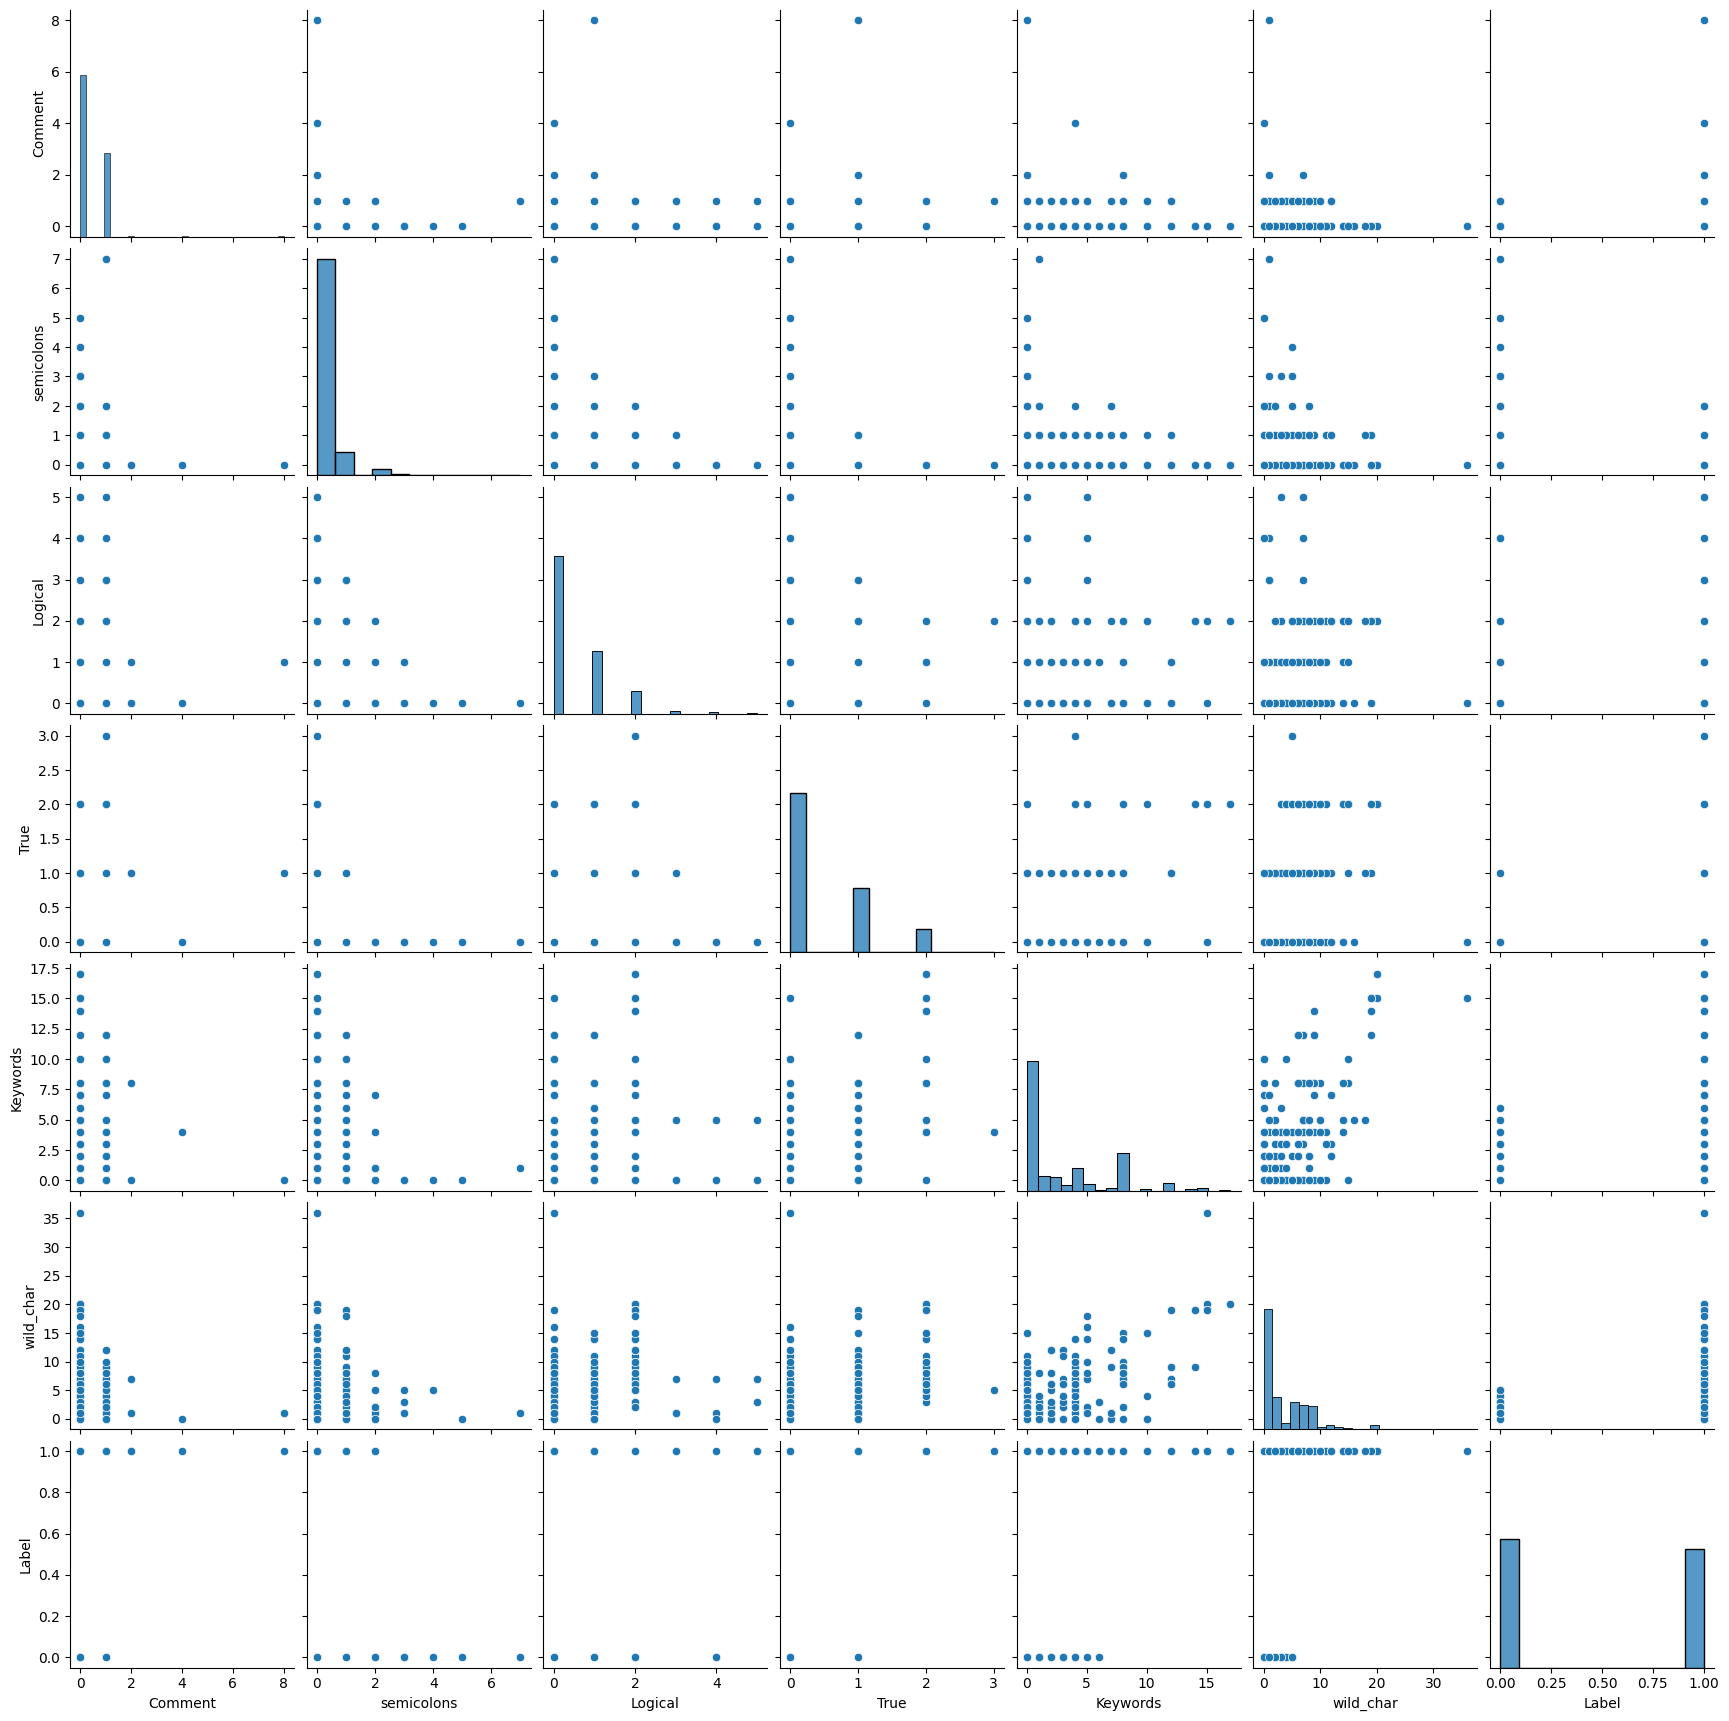

In [61]:
sns.pairplot(data)

In [62]:
corr_matrix = data.corr()
corr_matrix['Label'].sort_values(ascending=False)

Label         1.000000
True          0.700688
wild_char     0.698065
Keywords      0.651966
Comment       0.570497
Logical       0.486345
semicolons   -0.103115
Name: Label, dtype: float64

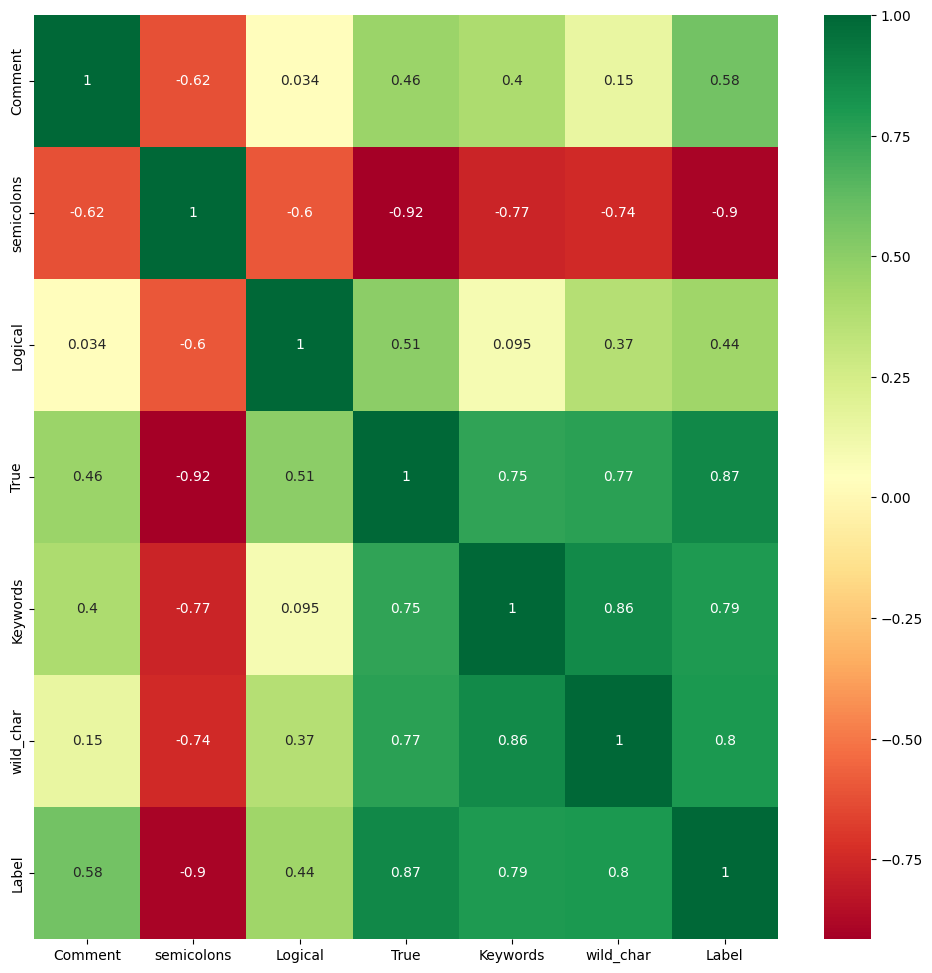

In [63]:
index = corr_matrix.index
plt.figure(figsize = (12,12))
g = sns.heatmap(corr_matrix[index].corr(), annot = True, cmap = "RdYlGn")

In [64]:
X = data.drop(['Label'], axis=1)
y = data['Label']

In [65]:
data.head()

,Comment,semicolons,Logical,True,Keywords,wild_char,Label
0,0,0,1,1,6,3,1
1,1,0,1,1,0,2,1
2,1,1,3,0,0,1,1
3,1,1,3,0,0,1,1
4,0,0,1,1,0,5,1


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [67]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [68]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.95      0.95      0.95        61

    accuracy                           0.95       116
   macro avg       0.95      0.95      0.95       116
weighted avg       0.95      0.95      0.95       116



In [69]:
print(confusion_matrix(y_test, pred_rfc))

[[52  3]
 [ 3 58]]


In [70]:
rfc.score(X_train,y_train)*100

98.7012987012987

In [71]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [72]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.97      0.93      0.95        61

    accuracy                           0.95       116
   macro avg       0.95      0.95      0.95       116
weighted avg       0.95      0.95      0.95       116



In [73]:
print(confusion_matrix(y_test, pred_lr))

[[53  2]
 [ 4 57]]


In [74]:
lr.score(X_train,y_train)*100

95.23809523809523

In [75]:
data1 = data.drop('semicolons', axis=1)

In [76]:
X_new = data1.drop('Label', axis=1)
y_new = data1['Label']

In [77]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [78]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_1,y_train_1)
pred_rfc = rfc.predict(X_test_1)

In [79]:
print(classification_report(y_test_1,pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.95      0.95      0.95        61

    accuracy                           0.95       116
   macro avg       0.95      0.95      0.95       116
weighted avg       0.95      0.95      0.95       116



In [80]:
print(confusion_matrix(y_test_1, pred_rfc))

[[52  3]
 [ 3 58]]


In [81]:


# Save the model
with open('DBMS.pkl', 'wb') as file:
    pickle.dump(rfc, file)
